## Experimental Comparison and Validation of Extrinsic Camera Transformations
This notebook explores the validation:
- If after applying camera transformations on intrinsic camera transformation matrix to get real world coordinates (extrinsic), actually makes sense, but how? Of course by plotting them
- According to our observation, since the intrinsic camera coordinates make more sense visually, we cluster them by k-means for an effort to visualize the diversity in selected frames
- Finally, we feed these selected samples by kmeans to our model to check the values of the metrics (Quantiative analysis) 

In [1]:
import numpy as np
import torch
import pandas as pd
from data_utils import load_nerf_data
from utils import cluster_poses_by_kmeans, extrinsic_intrinsic_logs_path, camera_position_from_extrinsic_matrix, plot_images_as_grid

C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
def get_transform_type(is_extrinsic):
    return 'Extrinsic' if is_extrinsic else 'Intrinsic'

Plotting Clustered Extrinsic Positions (ship)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


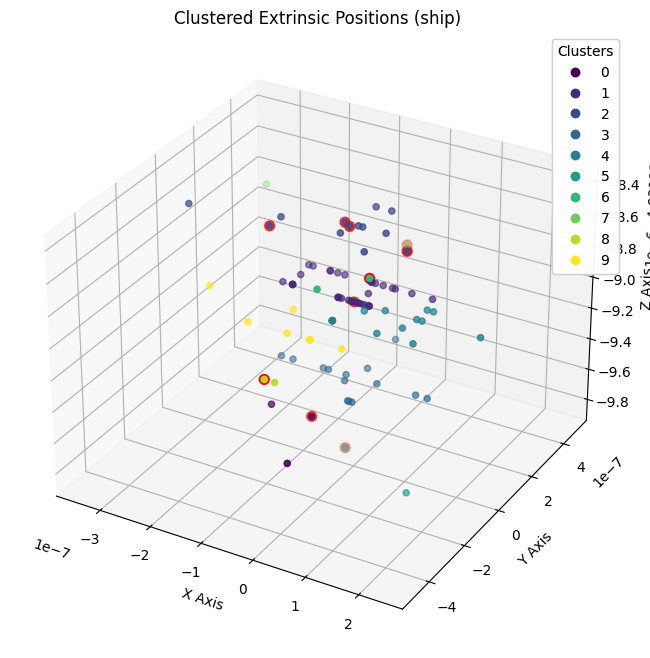

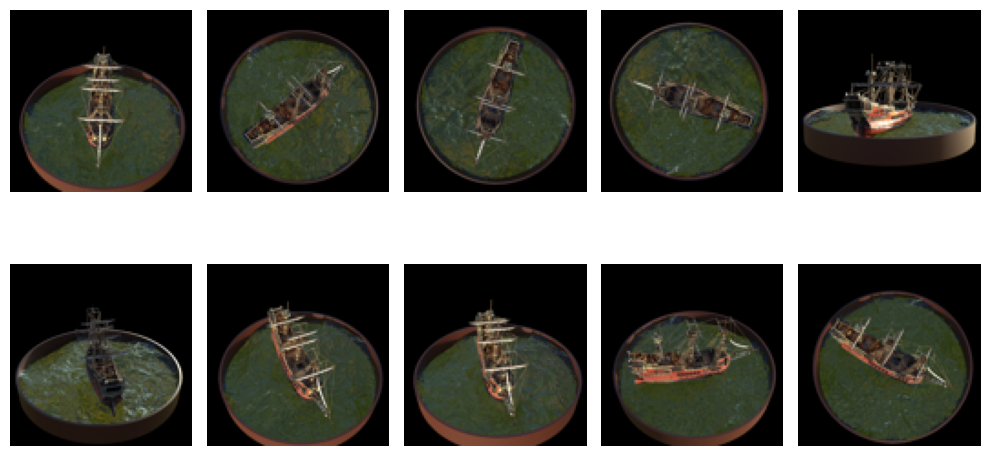

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (ship)


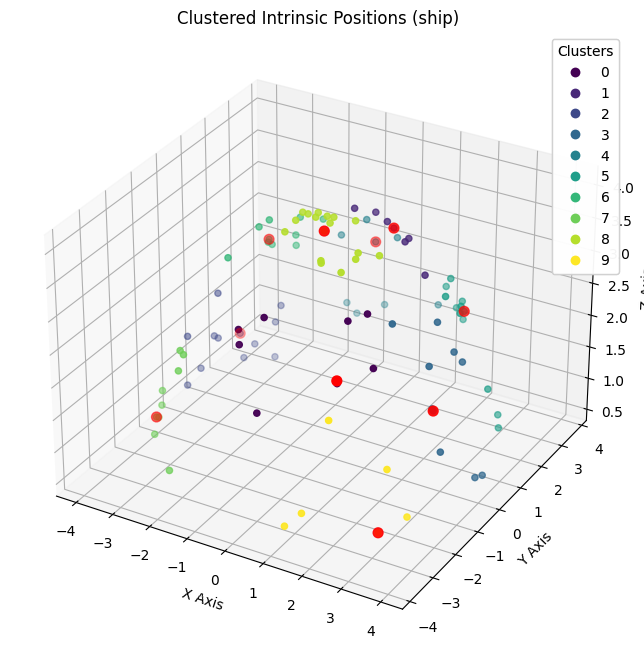

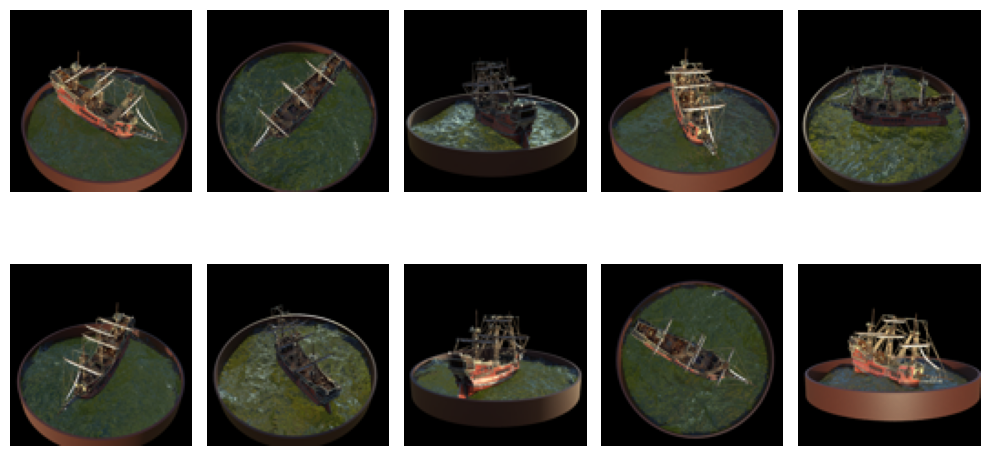

Plotting Clustered Extrinsic Positions (drums)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


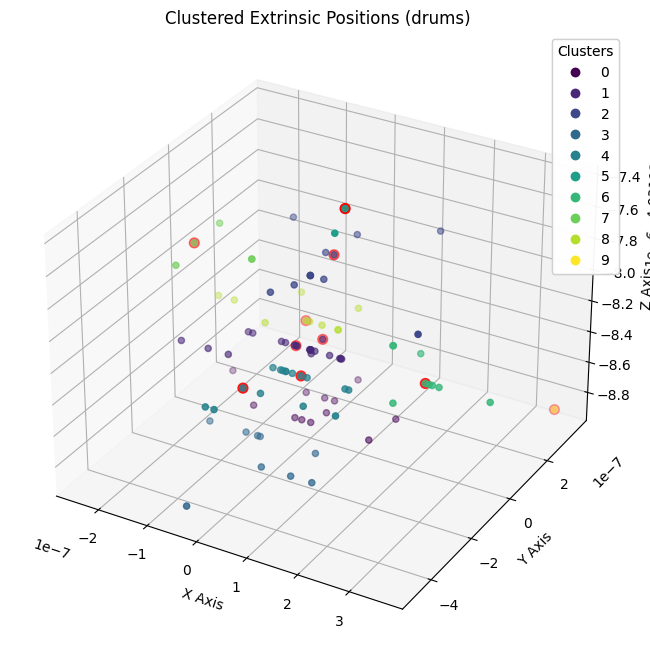

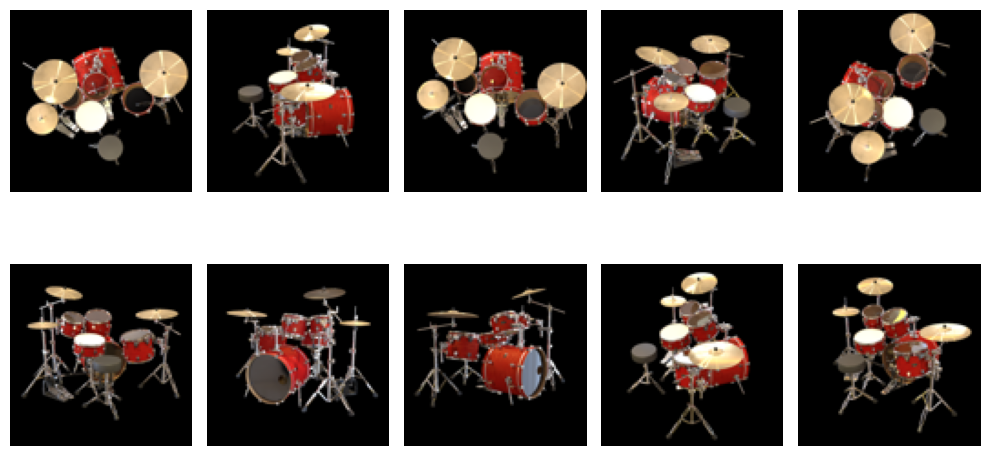

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (drums)


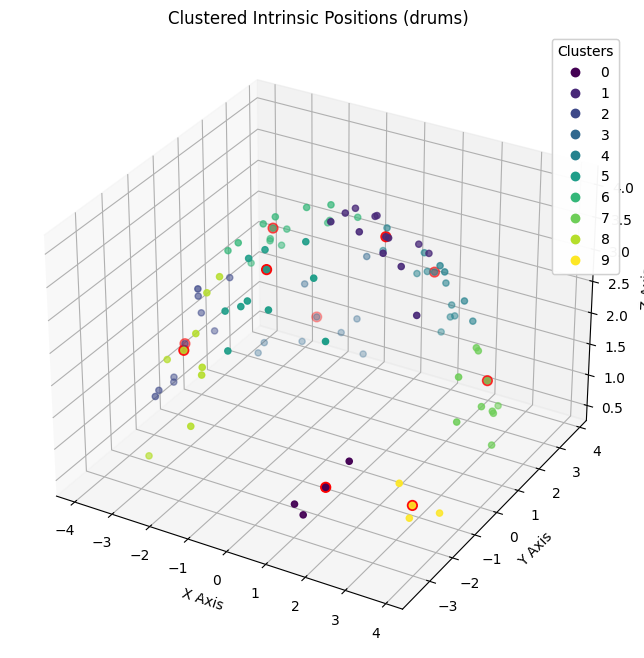

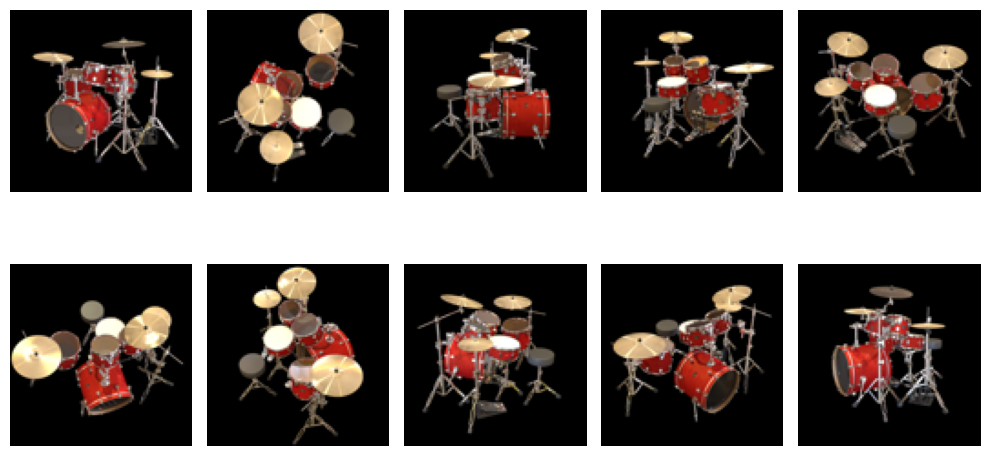

Plotting Clustered Extrinsic Positions (ficus)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


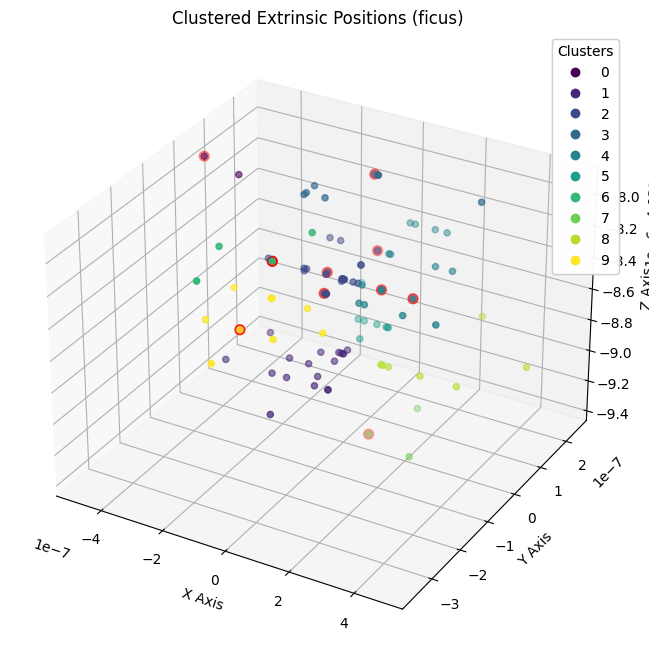

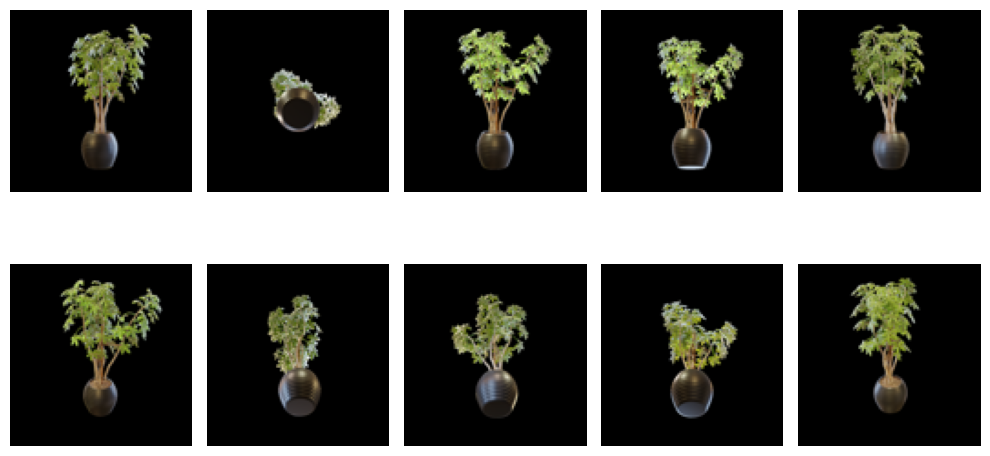

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (ficus)


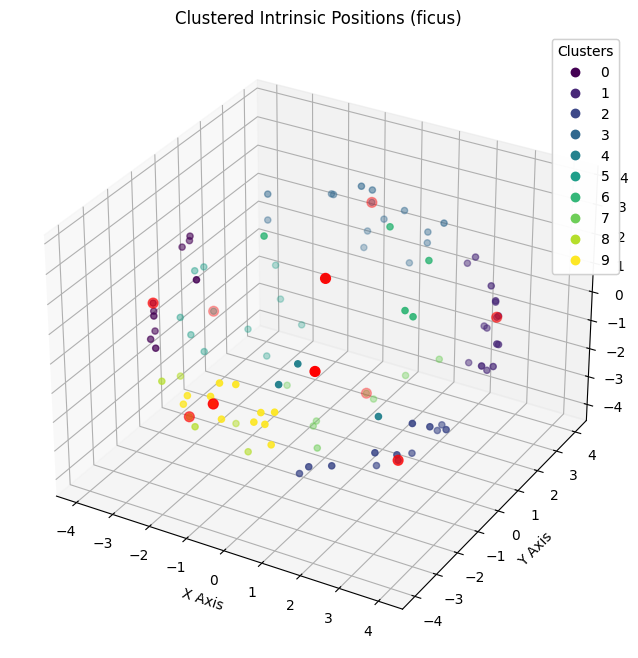

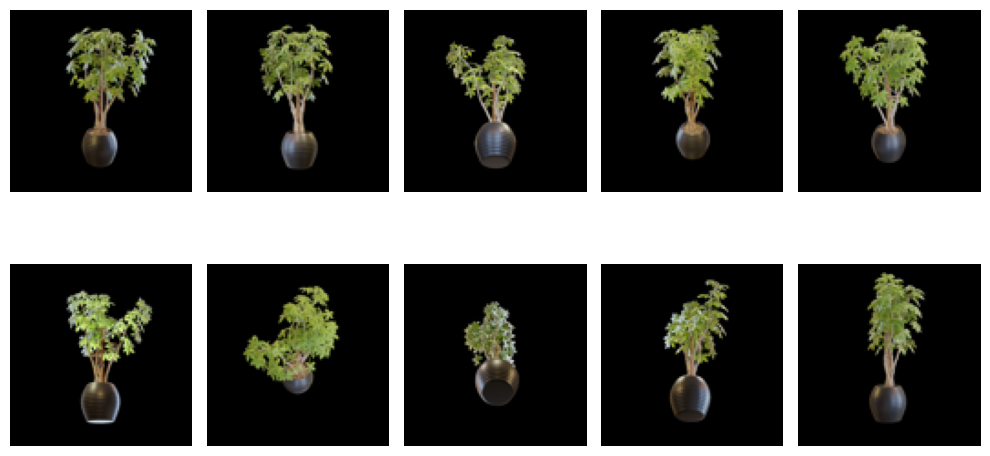

Plotting Clustered Extrinsic Positions (hotdog)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


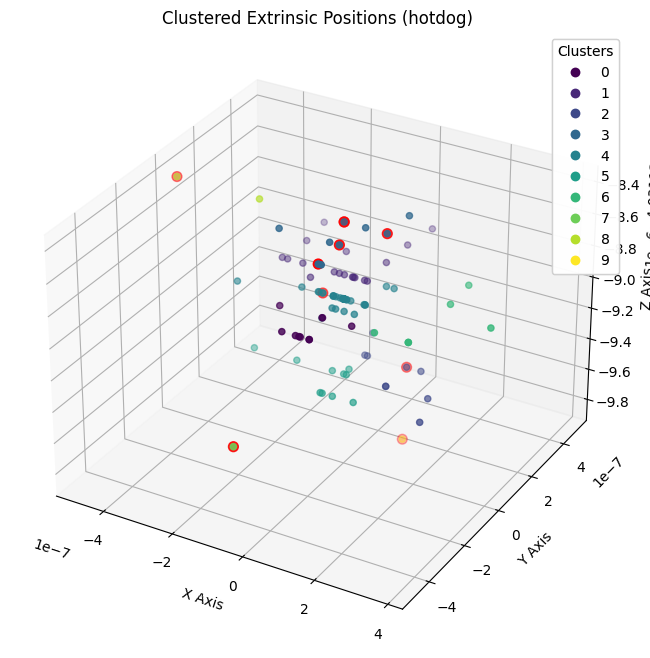

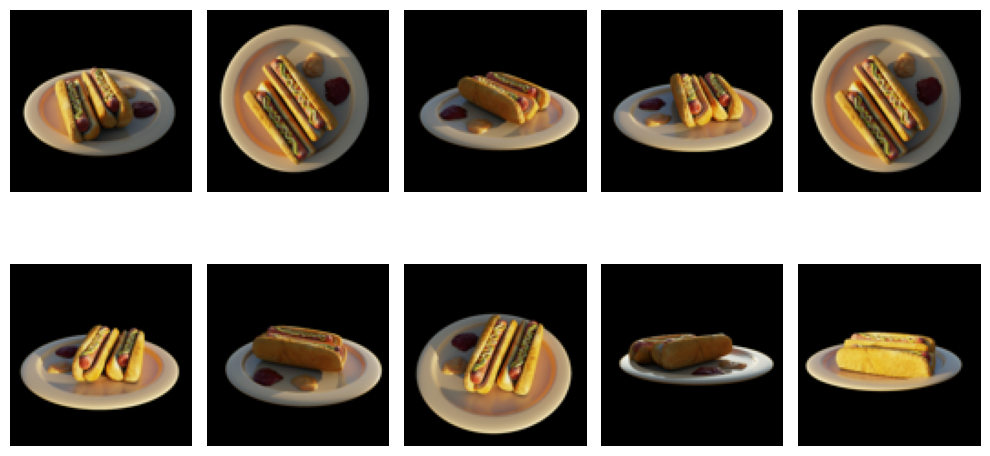

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (hotdog)


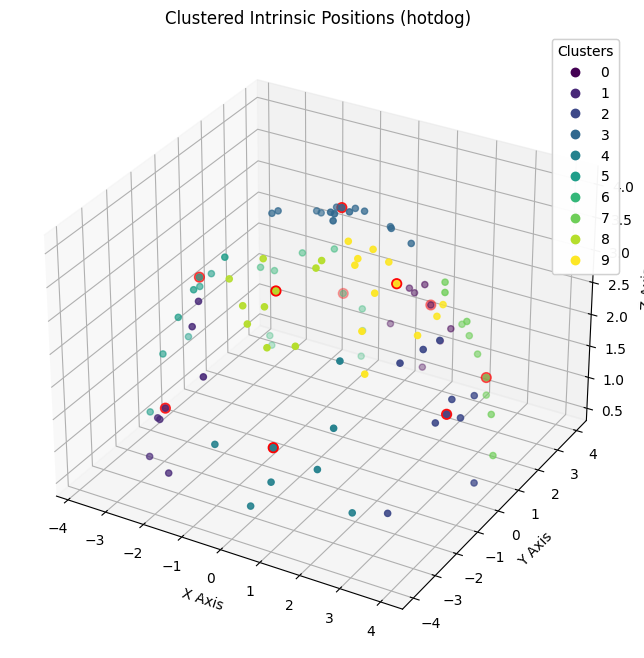

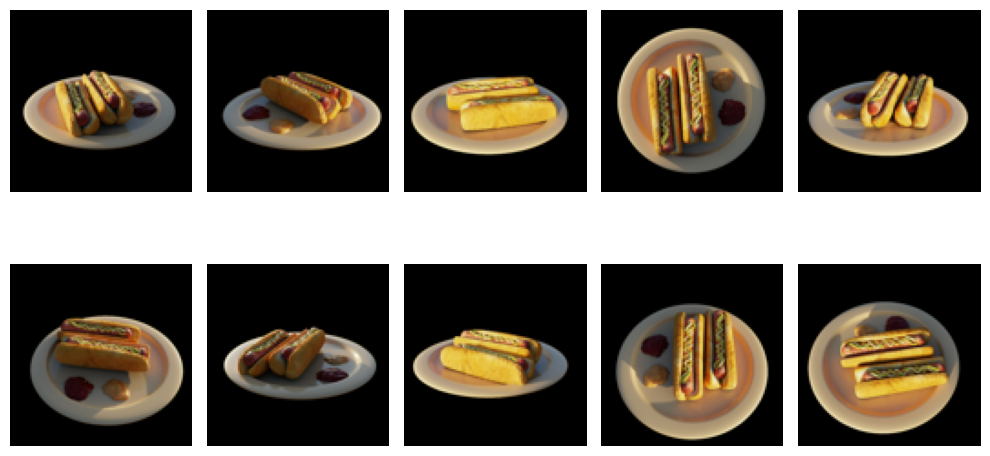

Plotting Clustered Extrinsic Positions (lego)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


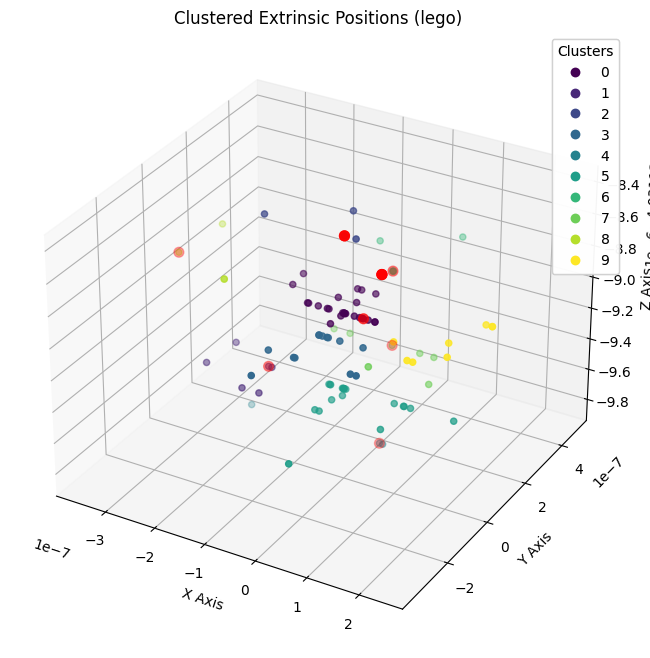

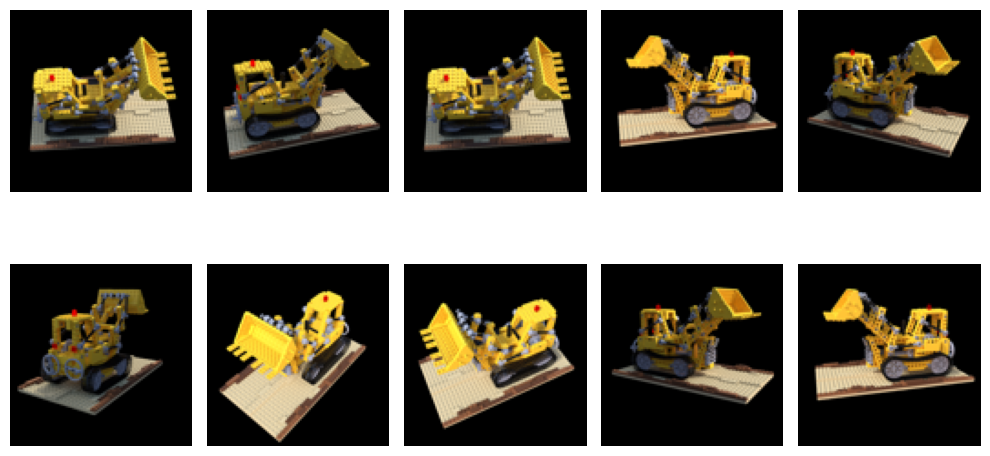

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (lego)


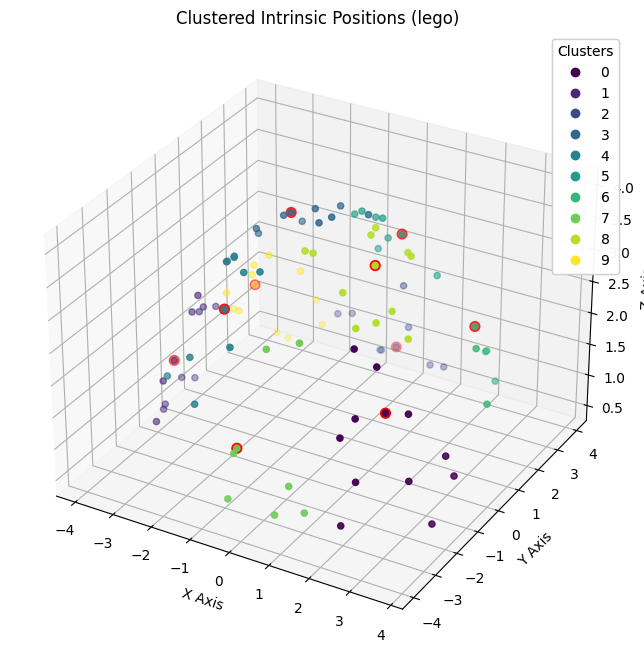

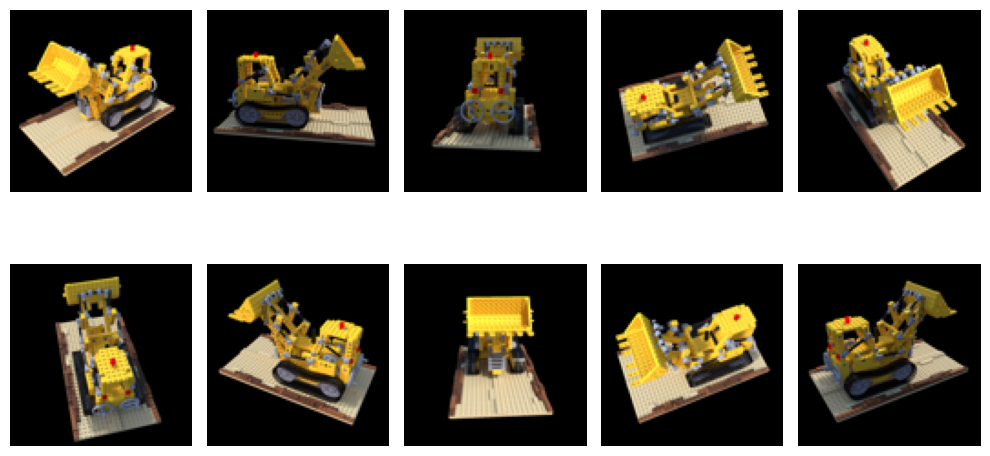

Plotting Clustered Extrinsic Positions (materials)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


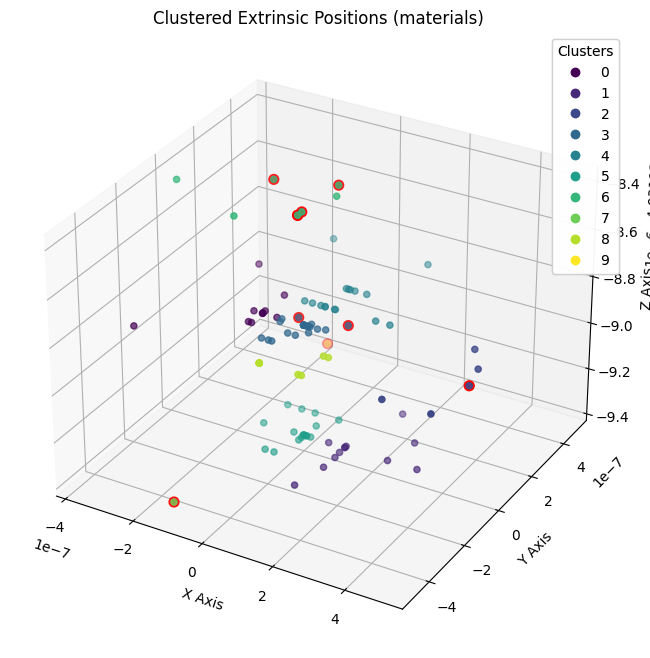

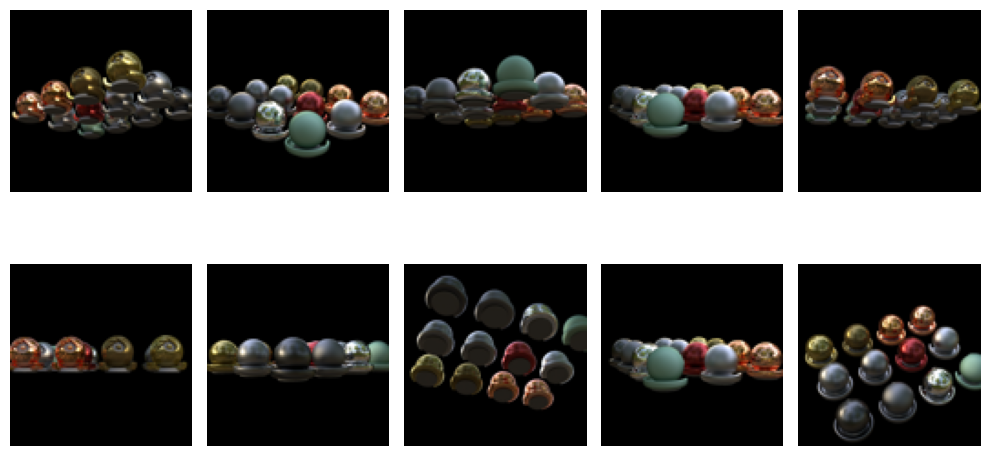

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (materials)


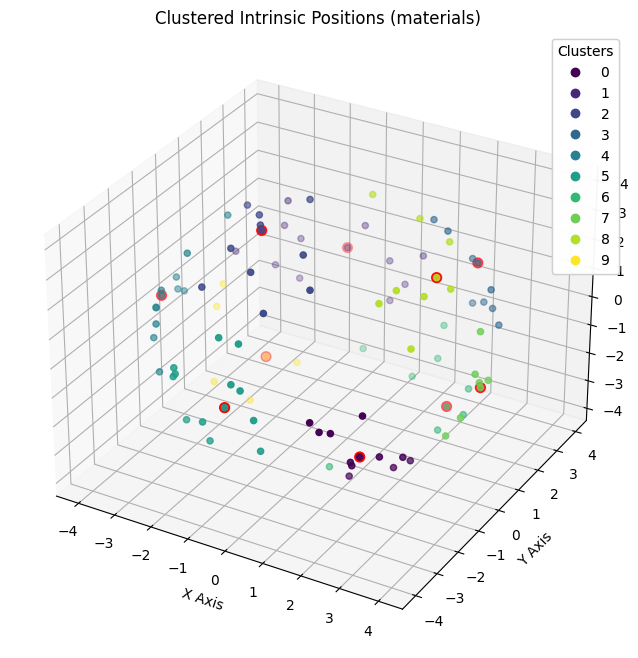

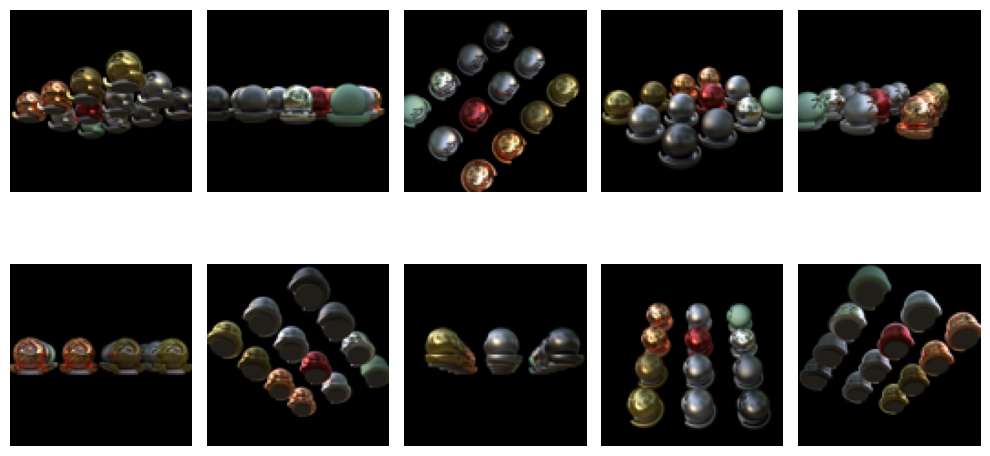

Plotting Clustered Extrinsic Positions (mic)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


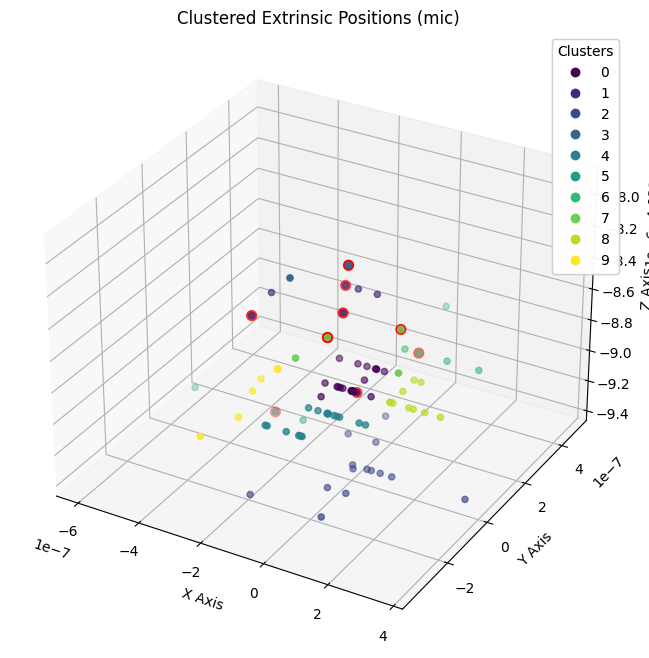

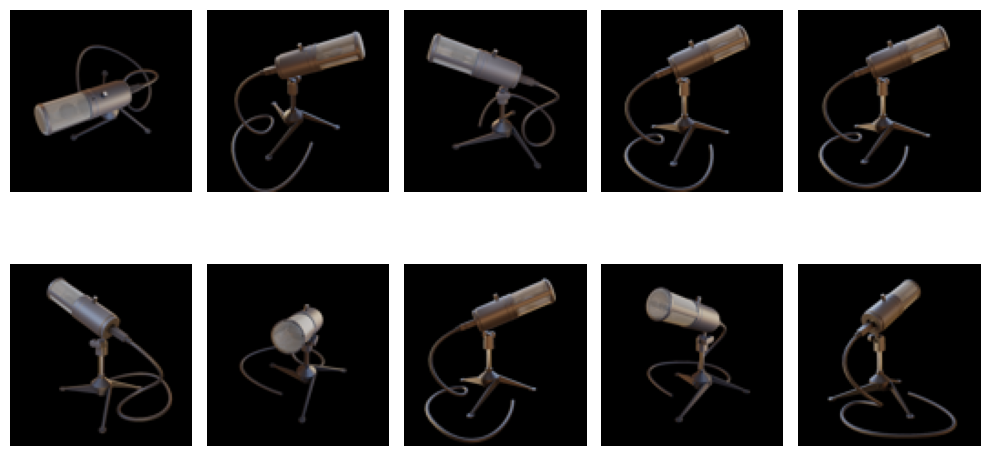

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (mic)


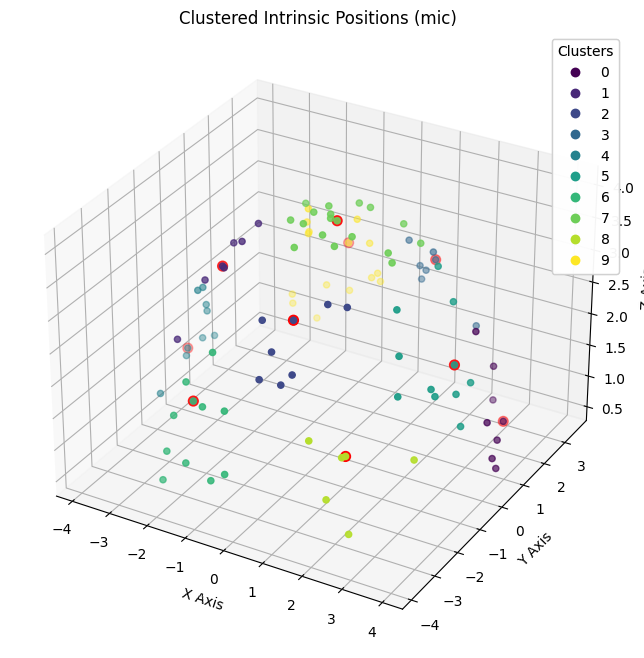

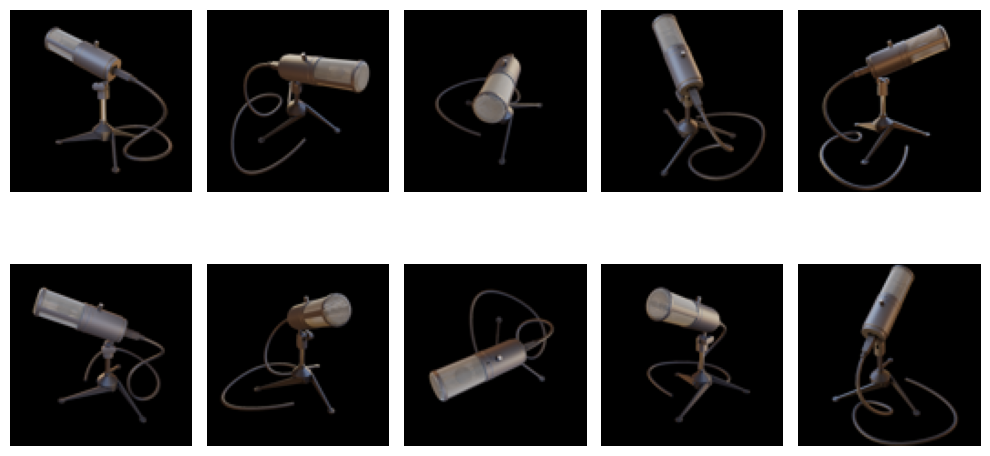

Plotting Clustered Extrinsic Positions (chair)


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


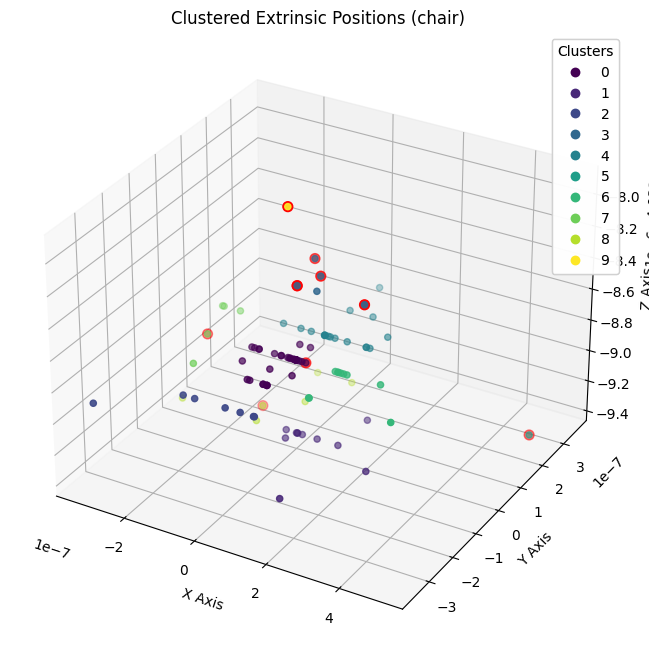

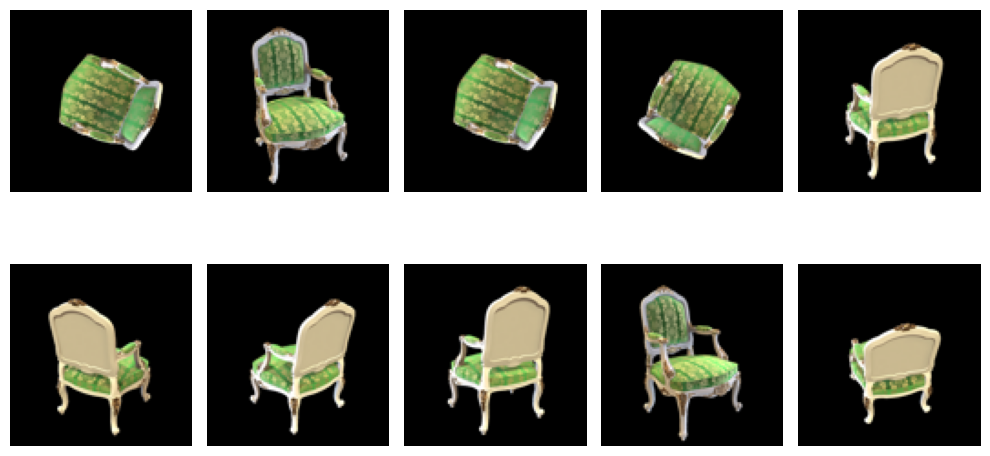

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_14068\3992436164.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)
C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clustered Intrinsic Positions (chair)


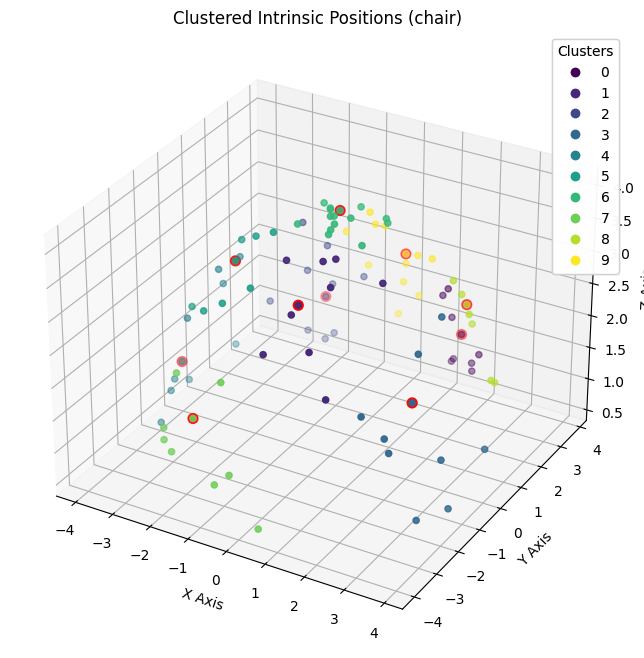

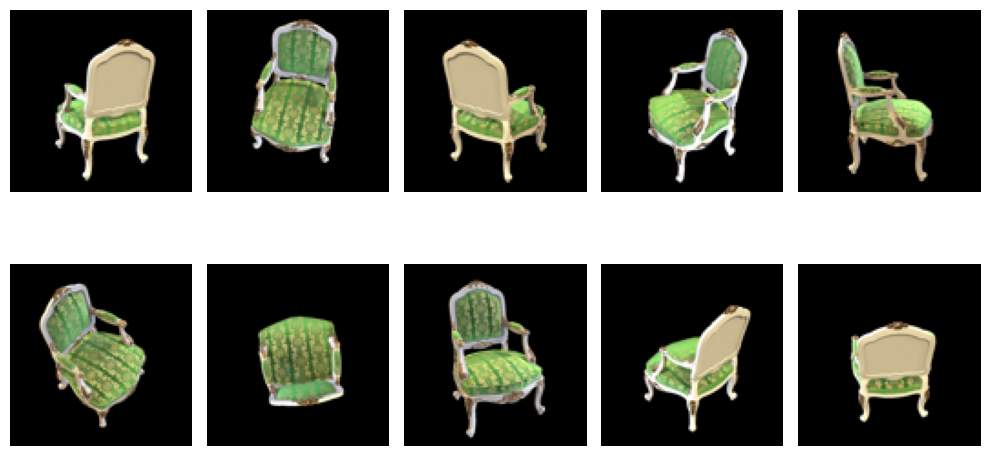

In [3]:
subjects = ['ship', 'drums', 'ficus', 'hotdog', 'lego', 'materials', 'mic', 'chair']

# Create an empty DataFrame to store the selected indices to run futher experiments
df = pd.DataFrame(columns=['subject', 'selected_image_indices'])

# Iterate over the subjects
for subject in subjects:
    images_tf, train_poses, camera_angle_x = load_nerf_data('./data/nerf_synthetic', subject, 'transforms_train.json')
    # Setup Extrinsic and Intrinsic camera matrices
    camera_poses_extrinsic = np.array([camera_position_from_extrinsic_matrix(torch.tensor(pose)).numpy() for pose in train_poses])
    # Drop the rotation matrix R from the extrinsic matrix [R | t]
    camera_poses_intrinsic = train_poses[:, :3, 3]
    # It leaves us with (100, 0, 3) shape
    camera_poses_intrinsic = camera_poses_intrinsic.reshape((camera_poses_intrinsic.shape[0], 3))

    # Now let's cluster, plot and save the results (figures and sampled images)

    # 1) Extrinsic
    is_extrinsic = True
    transform_type = get_transform_type(is_extrinsic)
    title = f'Clustered {transform_type} Positions ({subject})'
    # Print a prompt for the classification of results
    print(f'Plotting {title}')
    save_path = f'clustered_{transform_type}_positions_{subject}.png'
    selected_images_indices = cluster_poses_by_kmeans(camera_poses_extrinsic, title, n_clusters=10, save_path=save_path)
    plot_images_as_grid(images_tf[selected_images_indices], f'{subject}_{transform_type}_images.png')

    # Unwrap the list of indices to a string
    indices_output = str(selected_images_indices).replace('[','').replace(']','').replace(' ','')
    # Append the data to the DataFrame
    df = df.append({'subject': subject, 'selected_image_indices': indices_output}, ignore_index=True)

    # 2) Intrinsic
    is_extrinsic = False
    transform_type = get_transform_type(is_extrinsic)
    title = f'Clustered {transform_type} Positions ({subject})'
    # Print a prompt for the classification of results
    print(f'Plotting {title}')
    save_path = f'clustered_{transform_type}_positions_{subject}.png'
    selected_images_indices = cluster_poses_by_kmeans(camera_poses_intrinsic, title, n_clusters=10, save_path=save_path)
    plot_images_as_grid(images_tf[selected_images_indices], f'{subject}_{transform_type}_images.png')

# Save the DataFrame as a TSV file
df.to_csv(f'{extrinsic_intrinsic_logs_path}/intrinsic_camera_frames_by_subject.tsv', sep='\t', index=False)
    
